In [2]:

from io import StringIO
import requests
import json
import pandas as pd


df = pd.read_csv(r'C:\Users\12bee\Downloads\Jupyter Notebooks\v1\Book1.csv')
df.head()


,Time,Apartment1
0,01-11-12 0:00,101
1,01-11-12 0:30,48
2,01-11-12 1:00,30
3,01-11-12 1:30,71
4,01-11-12 2:00,33


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df['Time'])
df.index = df['Time']
del df['Time']


In [34]:
df_Jan1=df['2013-01-06':'2013-01-09']

Text(0,0.5,'Electricity (Watt-hour)')

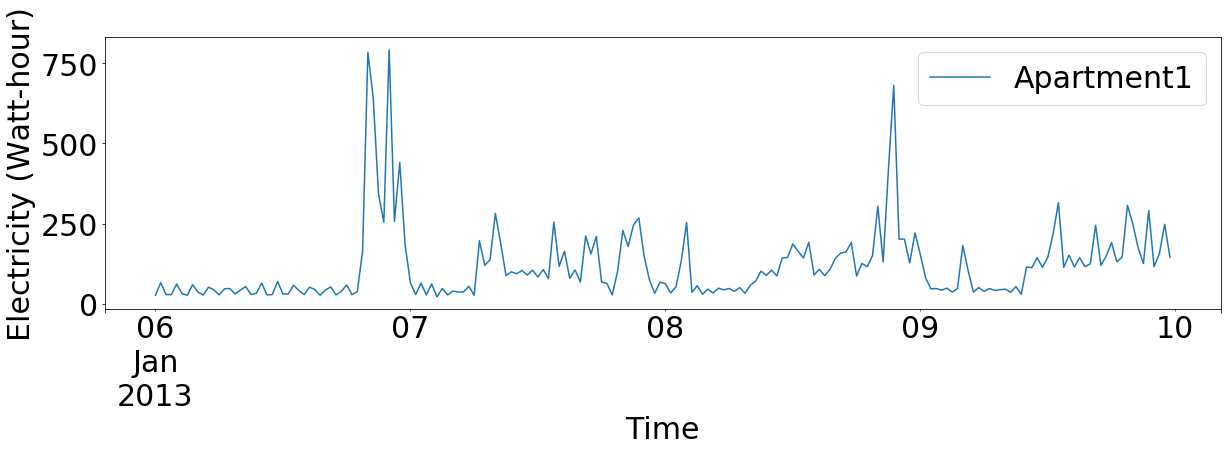

In [36]:
df_Jan1.plot(y='Apartment1', figsize=(20,5))
plt.ylabel('Electricity (Watt-hour)')

In [37]:
df_Jan=df_Jan1

In [38]:
df_Jan['date'] = df_Jan.index
df_Jan['date'] = pd.to_datetime(df_Jan['date'])
df_Jan.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Apartment1,date
Time,,
2013-01-06 00:00:00,27,2013-01-06 00:00:00
2013-01-06 00:30:00,66,2013-01-06 00:30:00
2013-01-06 01:00:00,29,2013-01-06 01:00:00
2013-01-06 01:30:00,29,2013-01-06 01:30:00
2013-01-06 02:00:00,62,2013-01-06 02:00:00


In [39]:
import numpy as np

X=(df_Jan['date'] - df_Jan['date'][0])/1000000000
y = (df_Jan['Apartment1'].values)


X=X.reshape(-1,1)
y=y.flatten()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [40]:
# Not Splitting the dataset into the Training set and Test set as data set too small
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train=X_train.reshape(-1,1)
y_train=y_train.flatten()
X_test=X_test.reshape(-1,1)
y_test=y_test.flatten()


In [44]:
# Fitting Linear Regression to the dataset for comparison purposes
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Fitting Polynomial Regression to the dataset
# This is just linear regression with PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
#set the maximum degree to use in the model
poly_reg = PolynomialFeatures(degree = 14)
#transform the feature matrix to introduce the derived polynomial features (each is Level raised to a higher power)
X_poly = poly_reg.fit_transform(X_train)
Xt_poly = poly_reg.fit_transform(X_test)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
predP=lin_reg_2.predict(Xt_poly)


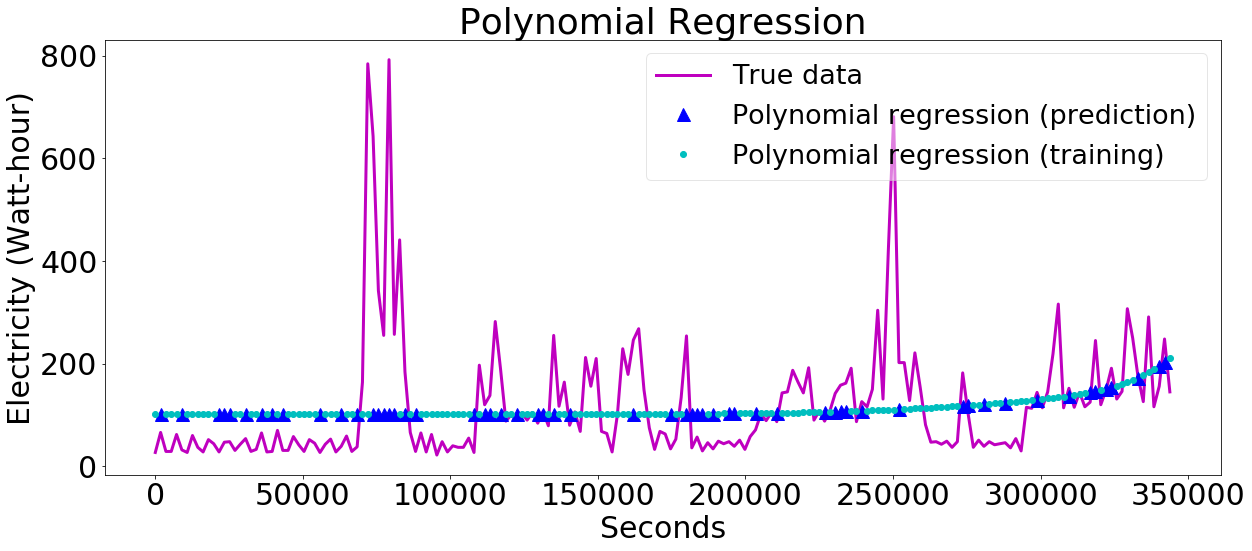

In [45]:
# Visualising the Linear Regression results

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 30})
plt.plot(X,y,'m-', label='True data', linewidth=3)

#plt.plot(X_test, lin_reg.predict(X_test), 'b^', label='Linear regression (prediction)', ms=13)
plt.plot(X_test, predP, 'b^', label='Polynomial regression (prediction)', ms=13)

#plt.plot(X_train, lin_reg.predict(X_train), 'bo', label='Linear regression (training)')
plt.plot(X_train, lin_reg_2.predict(X_poly), 'co', label='Polynomial regression (training)')

plt.title('Polynomial Regression')
plt.ylabel('Electricity (Watt-hour)', fontsize=30)
plt.xlabel('Seconds', fontsize=30)
plt.legend(loc='upper right', fontsize=27,framealpha=0.5)
plt.savefig('6b.pdf', bbox_inches='tight')
plt.show()


In [46]:
import math

from sklearn.metrics import r2_score
print ("Poly,r2_score: " + str(r2_score(y_train, lin_reg_2.predict(X_poly))))
from sklearn.metrics import mean_squared_error
print ("Poly,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, predP)))/np.mean(y_test)))
print ("Poly,NMAE: " + str(1-np.mean(np.abs((y_test - predP) / y_test))))

from sklearn.metrics import r2_score
print ("Linear,r2_score: " + str(r2_score(y_train, lin_reg.predict(X_train))))
from sklearn.metrics import mean_squared_error
print ("Linear,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))/np.mean(y_test)))
print ("Linear,NMAE: " + str(1-np.mean(np.abs((y_test - lin_reg.predict(X_test)) / y_test))))

Poly,r2_score: 0.03123352734983187
Poly,RMSE: -0.011183774383153988
Poly,NMAE: 0.09248636283564415


TypeError: Cannot cast array data from dtype('float64') to dtype('<m8') according to the rule 'safe'